# Projet Datamining

*Théo Bruendet, Arthur Saunier, Ethan Caillot-Gallois*

## Collecte de données

Image pokemon de kaggle  
licence: Attribution 4.0 International (CC BY 4.0)  
Vishal Subbiah (Owner)  
data scrapped from: https://pokemondb.net/pokedex/national  
Source dataset: https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types?resource=download  



In [18]:
from PIL import Image
import os
import pandas as pd
from os import listdir
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
import csv

path = 'data/images/'

def GetListeFichier():
    files = os.listdir(path)
    return files

file_list = GetListeFichier()

#Fonction retournant le nom du fichier correspondant au nom de pokemon
def GetNomFichier(Image_name, file_list):
    for name in file_list:
        if (name.find(Image_name)) != -1:
            file_name = path + name
            return file_name
    #Si le fichier n'existe pas
    print("The file you are trying to open doesn't exist: ", file_name)
    return -1

#test = GetNomFichier("zygarde", file_list)
    
#Fonction qui recupère la hauteur, largeur, le mode et l'extension de l'image.
def GetDataImage(file_name):
    img = Image.open(file_name)
    data = {'height' : img.height, 'width' : img.width, 'mode' : img.mode, 'extension' : img.format}
    return data

#Fonction qui donne les couleurs dominante de chaque image sous forme (R,G,B).
def GetCouleurs(file_name):
    imgfile = Image.open(file_name)
    numarray = numpy.array(imgfile.getdata(), numpy.uint8)
    if (numarray.ndim != 2):
        numarray = numarray.reshape(-1,4)
    clusters = KMeans(n_clusters=4)
    clusters.fit(numarray)
    couleurs=[]
    list_couleurs=[]
    for i in range (1,4):
        couleurs.append("(" + str(math.ceil(clusters.cluster_centers_[i][0])) + "," + str(math.ceil(clusters.cluster_centers_[i][1])) +"," + str(math.ceil(clusters.cluster_centers_[i][2])) + ")")
    list_couleurs = list_couleurs + couleurs    
    return list_couleurs

#Fonction sauvegardant les données récupéré dans le .csv
def SaveData(listeFichier):
    csvfile = pd.read_csv('data/pokemon.csv')
    
    if not csvfile.empty:
        for index, row in csvfile.iterrows():
            #print(row['Name'])
            color = GetCouleurs(GetNomFichier(row['Name'], listeFichier))
            data = GetDataImage(GetNomFichier(row['Name'], listeFichier))
            
            if(color != -1):
                csvfile.at[index, 'Hauteur'] = data['height']
                csvfile.at[index, 'Largeur'] = data['width']
                csvfile.at[index, 'Mode'] = data['mode']
                csvfile.at[index, 'Extension'] = data['extension']
                csvfile.at[index, 'Couleur1'] = color[0]
                csvfile.at[index, 'Couleur2'] = color[1]
                csvfile.at[index, 'Couleur3'] = color[2]
                
                csvfile.to_csv("data/pokemon.csv", index = False)
                print("analyse terminée")
            else:
                print("Erreur lors de la sauvegarde ds le .csv")                
            
MiseAJourCSV = SaveData(file_list)                    
            

analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse termin

analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse terminée
analyse termin

## 

            Name     Type1   Type2  Hauteur  Largeur  Mode       Couleur1  \
0      bulbasaur     Grass  Poison    120.0    120.0     P  (176,179,180)   
1        ivysaur     Grass  Poison    120.0    120.0  RGBA        (1,1,0)   
2       venusaur     Grass  Poison    120.0    120.0  RGBA  (125,121,108)   
3     charmander      Fire   Aucun    120.0    120.0  RGBA  (240,197,138)   
4     charmeleon      Fire   Aucun    120.0    120.0  RGBA  (245,180,154)   
..           ...       ...     ...      ...      ...   ...            ...   
804    stakataka      Rock   Steel    120.0    120.0   RGB     (67,72,72)   
805  blacephalon      Fire   Ghost    120.0    120.0   RGB  (165,156,159)   
806      zeraora  Electric   Aucun    120.0    120.0   RGB     (96,97,70)   
807       meltan     Steel   Aucun    120.0    120.0   RGB  (160,152,137)   
808     melmetal     Steel   Aucun    120.0    120.0   RGB  (139,136,128)   

          Couleur2       Couleur3 Extension  
0    (141,125,108)      (9,47

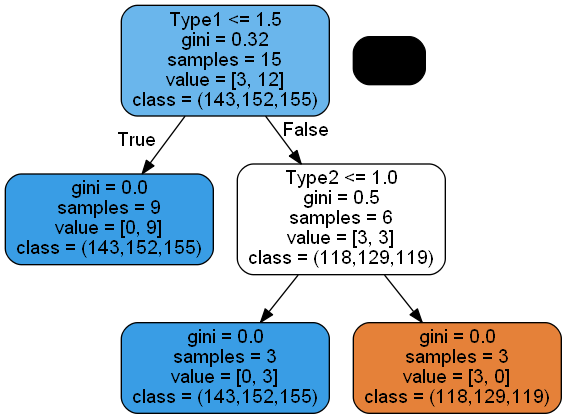

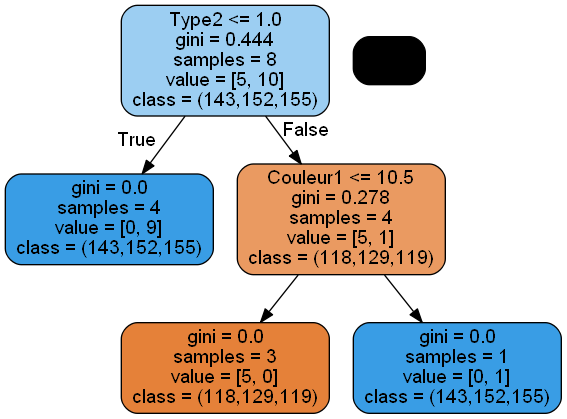

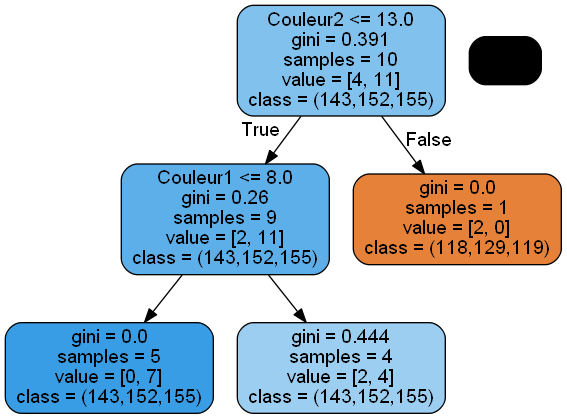

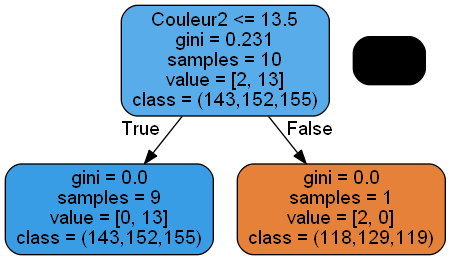

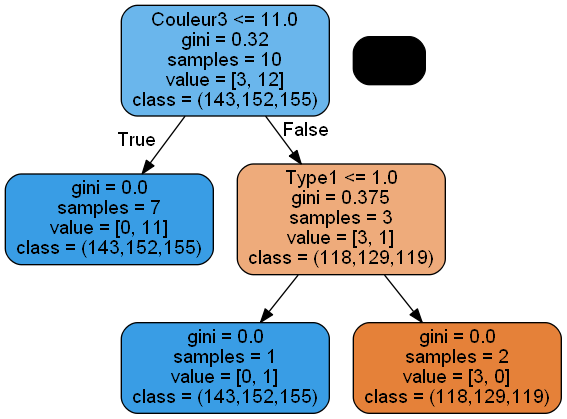

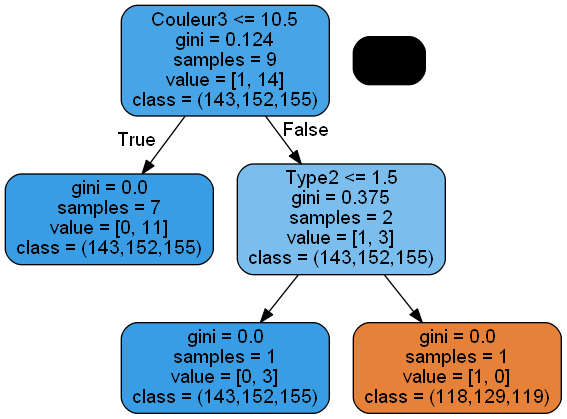

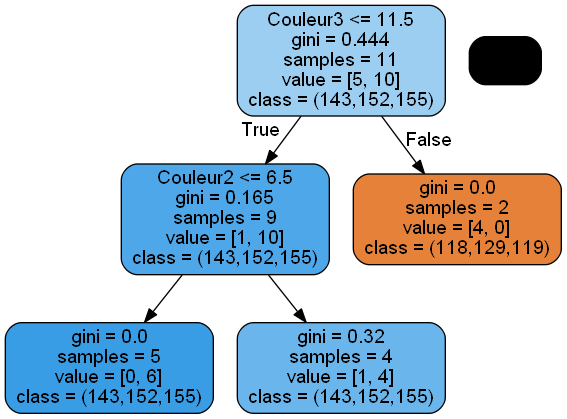

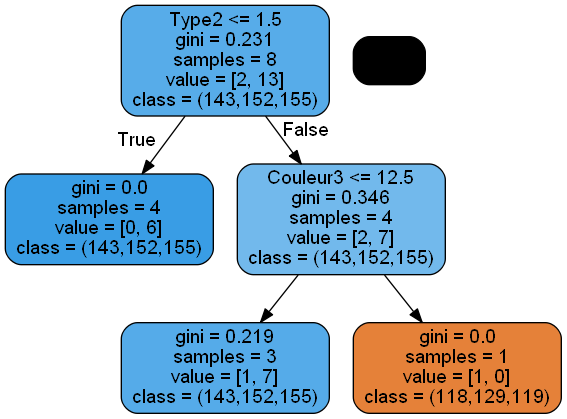

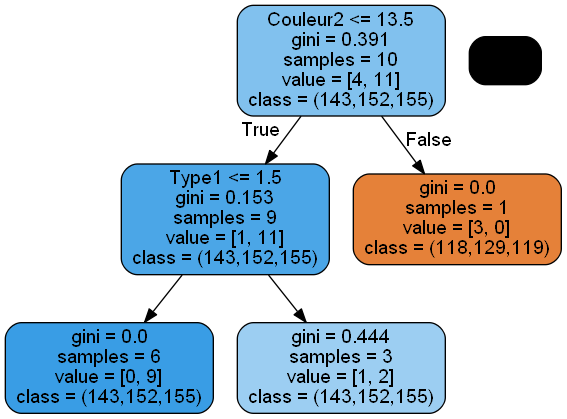

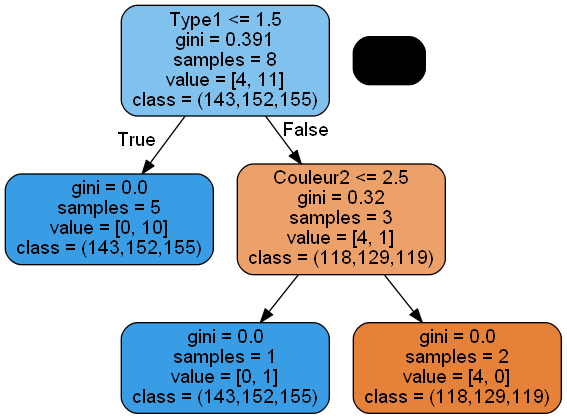

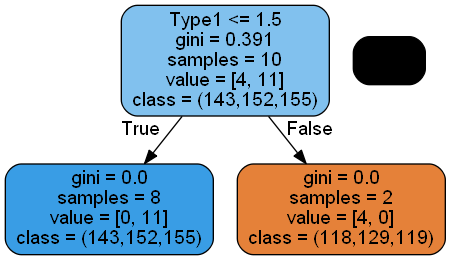

In [13]:
import numpy as np 
import pandas as pd
from sklearn import tree
from enum import Enum
from sklearn.preprocessing import LabelEncoder
import graphviz
import pydotplus
from IPython.display import Image, display
from sklearn.ensemble import RandomForestClassifier
  
    
df = pd.read_csv('data/pokemon.csv')
#On remplace les valeurs NaN par une string pour éviter des conflits lors du traitement des données
df['Type2'] = df['Type2'].fillna('Aucun')


#df["value1"] = df["Type1"].apply(lambda x: getattr(Types, x).value)
#df["value2"] = df["Type2"].apply(lambda x: getattr(Types, x).value)


result = [
              'Favorite',
              'Favorite',
              'Favorite',
              'NotFavorite',
              'NotFavorite',
              'NotFavorite',
              'NotFavorite',
              'NotFavorite',
              'NotFavorite',
              'NotFavorite',
              'NotFavorite',
              'NotFavorite',
              'NotFavorite',
              'NotFavorite',
              'NotFavorite'
              ]

#On retire les colonnes qui ne sont pas utile pour l'arbre de décision
data = df.drop(columns=['Name','Hauteur','Largeur','Mode','Extension'])
data = data.drop(labels=range(15, 809), axis=0)



print(df)
print(data)

#Use of decision tree classifiers
resultframe = pd.DataFrame(result, columns=['favorite'])

#generating numerical labels
le1 = LabelEncoder()
data['Type1'] = le1.fit_transform(data['Type1'])

le2 = LabelEncoder()
data['Type2'] = le2.fit_transform(data['Type2'])

le3 = LabelEncoder()
data['Couleur1'] = le3.fit_transform(data['Couleur1'])

le4 = LabelEncoder()
data['Couleur2'] = le4.fit_transform(data['Couleur2'])

le5 = LabelEncoder()
data['Couleur3'] = le5.fit_transform(data['Couleur3'])

le6 = LabelEncoder()
resultframe['favorite'] = le6.fit_transform(resultframe['favorite'])

#Creation de l'arbre de decision
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(data, resultframe)

#Affichage de l'arbre de decision
dot_data = tree.export_graphviz(dtc, out_file=None,
        feature_names=data.columns,
        filled=True, rounded=True, 
        class_names =
        le5.inverse_transform(
        resultframe.favorite.unique())
        ) 
graph = graphviz.Source(dot_data) 
     
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)

#Use of random forest classifier
rfc = RandomForestClassifier(n_estimators=10, max_depth=2,
                  random_state=0)
rfc = rfc.fit(data, resultframe.values.ravel())


#prediction dtc
#prediction = dtc.predict([
#        [le1.transform(['Grass'])[0], le2.transform(['Aucun'])[0]]])
#print(le6.inverse_transform(prediction))
#print(dtc.feature_importances_)

#prediction rtc
#prediction = rfc.predict([
#        [le1.transform(['Grass'])[0], le2.transform(['Aucun'])[0]]])
#print(le6.inverse_transform(prediction))
#print(rfc.feature_importances_)

#Affichage rtc
for i in range(10):
        dot_data = tree.export_graphviz(rfc.estimators_[i], out_file=None,
        feature_names=data.columns,
        filled=True, rounded=True,
        class_names =
         le5.inverse_transform(
           resultframe.favorite.unique())
        ) 
        graph = graphviz.Source(dot_data) 
        pydot_graph = pydotplus.graph_from_dot_data(dot_data)
        img = Image(pydot_graph.create_png())
        display(img)


In [75]:
import requests
import json
import os
import glob
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
import pandas as pd
import time
import random
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
#numpy.set_printoptions(threshold=20)

#variable emplacement fichier 
csvpokemon = 'data/pokemon.csv'
csvfavorite = 'data/favorite.csv'
images= 'data/images/'
le11 = LabelEncoder()
le12 = LabelEncoder()
le13 = LabelEncoder()

def openImage(nom):
    im = Image.open(images + nom)
    matrice_pixels = im.load()
    display(im)

def setPreferencesByName(pokemonIndex,preferences,nomPokemon):
    #Préparation du dataset
    df = pd.read_csv(csvfavorite)
    nbligne=df.count().Image
    
    df.at[nbligne,'Image'] = pokemonIndex
    df.at[nbligne,'Nom'] = nomPokemon
    df.at[nbligne,'Favorite'] = preferences
    df.to_csv(csvfavorite, index=False)
    
def setFavorite(fileList):
    
    entre='1'
    # On prépare le dataset puis compte le nombre de ligne pour pouvoir le parcourir
    df = pd.read_csv('data/pokemon.csv')
    nLigne = df.count().Name;
    # On vérifie si l'utilisateur souhaite continuer
    while entre.lower() != 'n' :
        if entre.lower() == '1' :
            # on prend une image au hasard puis on l'affiche
            image=random.randrange(1,nLigne);
            showImage(fileList[image])
            # On demande l'avis de l'utilisateur
            print("1 pour favorite 0 sinon")
            preferences = input()
            while preferences.lower() != '1' and preferences.lower() != '0' : 
                print("Valeur non reconnue")
                preferences = input()
            # On écris dans le csv "favorite" le choix de l'utilisateur
            nomPokemon = os.path.splitext(fileList[image])
            # On récupère l'index du pokemon dans le csv "pokemon" pour l'utiliser dans le csv "favorite"
            indexRow = df.index[df['Name']==nomPokemon[0]].tolist()
            setPreferencesByName(indexRow[0], preferences, nomPokemon[0])
        print("=============================")
        print("1 pour continuer")
        print("n pour quitter")
        print("=============================")
        entre = input()
        if entre.lower() == 'n':
            print("Fin de la sélection")       
            

def recommanderImage():
    data = pd.read_csv(csvpokemon) 
    data = data.drop(columns=['Name','Hauteur','Largeur','Mode','Extension'])
    data['Type2'] = data['Type2'].fillna('Aucun')
    data['Couleur1'] = le11.fit_transform(data['Couleur1'].astype(str))
    data['Couleur2'] = le12.fit_transform(data['Couleur2'].astype(str))
    data['Couleur3'] = le13.fit_transform(data['Couleur3'].astype(str))
    result = pd.read_csv(csvfavorite)
    
    #Trier les resultat 
    result.sort_values(by=['Image'], inplace=True)

    
    #garder que les bonne lignes dans data 
    data = data[data.index.isin(result.Image.tolist())]
    print(data.dtypes)
    print("test avec des types dans les colonnes")
    
    # génération d'étiquettes numériques

    le1 = LabelEncoder()
    data["Type1"] = le1.fit_transform(data["Type1"])

    le2 = LabelEncoder()
    data["Type2"] = le2.fit_transform(data["Type2"])
    
    le3 = LabelEncoder()
    data["Couleur1"] = le3.fit_transform(data["Couleur1"])

    le4 = LabelEncoder()
    data["Couleur2"] = le4.fit_transform(data["Couleur2"])
    
    le5 = LabelEncoder()
    data["Couleur3"] = le5.fit_transform(data["Couleur3"])

    le6 = LabelEncoder()
    result["Favorite"] = le6.fit_transform(result["Favorite"])
    
    dtc = tree.DecisionTreeClassifier()
    dtc = dtc.fit(data, result)
    

recommanderImage()




Type1       object
Type2       object
Couleur1     int32
Couleur2     int32
Couleur3     int32
dtype: object
test avec des types dans les colonnes


TypeError: '<' not supported between instances of 'str' and 'float'